# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,832,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199
1,502,86,36,66,128,57,8,131,52,18,127,148,252,139,76,5,27,183,187
2,277,86,41,66,129,55,7,135,50,18,136,154,266,165,74,3,4,180,187
3,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
4,177,89,44,72,160,66,7,144,46,19,147,166,312,169,69,11,1,191,198
5,428,112,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
6,715,100,52,109,225,68,10,222,30,25,165,241,731,207,73,7,28,188,199
7,144,95,45,80,186,62,7,164,40,20,145,188,406,178,65,11,18,199,204
8,491,97,45,76,175,60,9,157,42,20,149,180,370,169,63,16,12,198,206
9,446,101,52,101,197,62,9,188,35,22,162,208,527,203,67,14,15,193,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,433.510018,93.914390,45.010929,82.455373,169.074681,61.519126,8.63388,169.386157,40.899818,20.639344,148.400729,189.149362,443.134791,175.236794,72.329690,6.448087,12.938069,188.923497,195.724954
std,244.655505,8.287817,6.234753,16.021892,33.515274,7.706411,4.53281,34.138568,7.988300,2.657653,14.676054,32.216244,181.374044,32.693255,7.412178,4.913814,9.104011,6.007111,7.446827
min,0.000000,78.000000,33.000000,40.000000,104.000000,47.000000,2.00000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,226.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.00000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,435.000000,93.000000,45.000000,81.000000,167.000000,61.000000,8.00000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,647.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.00000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.00000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,261.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
# По .info() видно, что пропусков в данных нет, поэтому их не проверяем.
# Проверим на дубликаты:
X_train_pd.duplicated().sum()

0

In [7]:
# В .describe() видно, что в 0-м признаке подозрительный разброс (минимум сильно отличается от среднего, большое стандартное отклонение)
X_train_pd[0].nunique()

549

In [8]:
# Нулевой столбец - это порядковые номера строк (впрочем, это видно и в сыром датасете). 
# Этот столбец не несет никакой ценности, поэтому его стоит удалить, причем как из тренировочной выборки, так и из тестовой.
# X_train_pd = X_train_pd.drop([0], axis=1)
X_train_upd = X_train[:, 1:]
X_test_upd = X_test[:, 1:]

In [9]:
# Для логистической регрессии данные должны быть нормированы
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train_upd)
X_test_st = scaler.fit_transform(X_test_upd)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, f1_score
import scikitplot

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead 

# ! pip install scikit-plot

In [12]:
# создаем экземпляр модели и сетку гиперпараметров, запускаем GridSearchCV
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_logreg = GridSearchCV(logreg, params, cv=5, refit=True)
grid_logreg.fit(X_train_st, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [13]:
print('Best parameters:', grid_logreg.best_params_)
print('Best score:', grid_logreg.best_score_)

Best parameters: {'C': 100, 'penalty': 'l2'}
Best score: 0.7960300250208509


In [14]:
# сохраним лучшие параметры в переменные для дальнейшего переиспользования
best_C = grid_logreg.best_params_['C']
best_penalty = grid_logreg.best_params_['penalty']

In [15]:
# Оценка качества модели
y_pred = grid_logreg.predict(X_test_st)
logreg_acc = accuracy_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred, average='micro')
print('Test accuracy:', logreg_acc)
print('Test f1:', logreg_f1)

Test accuracy: 0.7845117845117845
Test f1: 0.7845117845117845


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

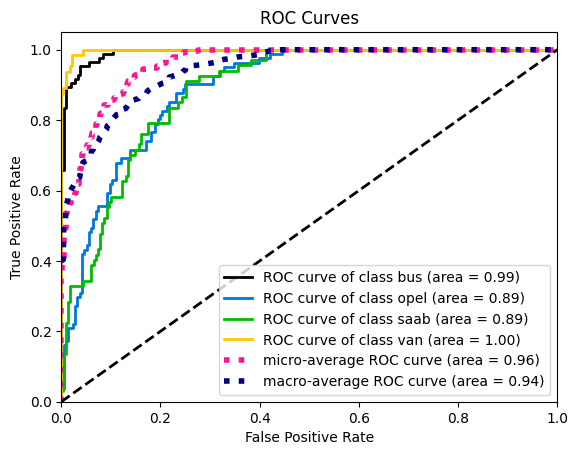

In [16]:
# Строим ROC-кривые 
predicted_proba = grid_logreg.predict_proba(X_test_st)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

C:\Users\-\AppData\Local\Temp\ipykernel_22916\2127100913.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


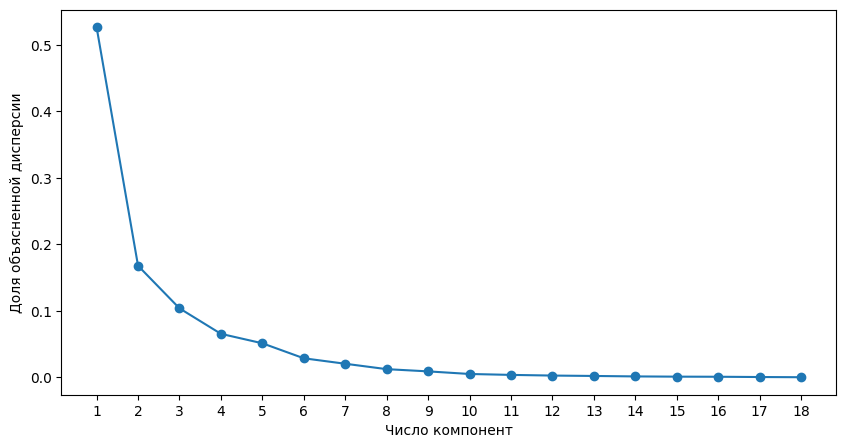

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# создаем экземпляр PCA
pca = PCA(random_state=42)
# PCA применяется на масштабированные данные, используем X_train_st
pca.fit(X_train_st)

# Строим график объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
ax.set_xlabel("Число компонент")
ax.set_xticks(range(1, len(explained_variance_ratio) + 1))
ax.set_ylabel("Доля объясненной дисперсии")
fig.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [18]:
# "Локоть" на графике выше выражен неярко. Я остановилась на 6 компонентах, так как линия графика после 6-й компоненты стабильно более пологая, чем до нее.
# Также тестировала 4 компоненты, но результат классификации получался существенно хуже (особенно по ROC-кривым). Видимо, при 4х идет слишком большая потеря информации.
# Данные для PCA нормализовывать нужно, но у меня они уже нормализованы (X_train_st, X_test_st).

pca_n6 = PCA(n_components=6, random_state=42)
X_train_pca = pca_n6.fit_transform(X_train_st)
X_test_pca = pca_n6.transform(X_test_st)
print(X_train_pca.shape)
print(X_test_pca.shape)

(549, 6)
(297, 6)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [19]:
# создаем экземпляр модели и сетку гиперпараметров, запускаем GridSearchCV
logreg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_logreg_pca = GridSearchCV(logreg_pca, params, cv=5, refit=True)
grid_logreg_pca.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [20]:
print('Best parameters:', grid_logreg_pca.best_params_)
print('Best score:', grid_logreg_pca.best_score_)

# Оценка качества модели
y_pred_pca = grid_logreg_pca.predict(X_test_pca)
logreg_acc_pca = accuracy_score(y_test, y_pred_pca)
logreg_f1_pca = f1_score(y_test, y_pred_pca, average='micro')
print('Test accuracy:', logreg_acc_pca)
print('Test f1:', logreg_f1_pca)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.6192493744787323
Test accuracy: 0.5622895622895623
Test f1: 0.5622895622895623


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

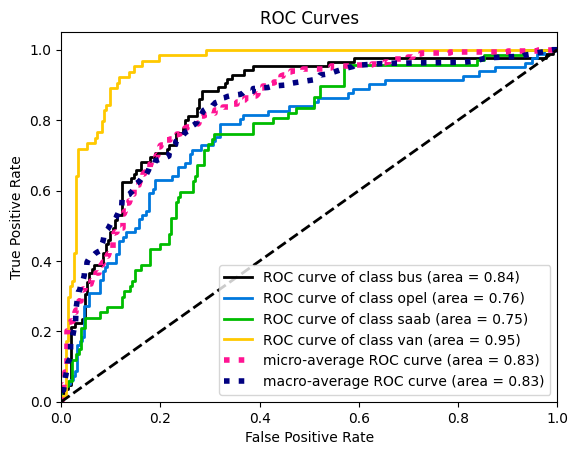

In [21]:
# Строим ROC-кривые 
predicted_proba_pca = grid_logreg_pca.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc(y_test, predicted_proba_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [22]:

from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': range(1, 11),
}

grid_tree_pca = GridSearchCV(tree, params, cv=5, refit=True)
grid_tree_pca.fit(X_train_pca, y_train)
print('Best parameters:', grid_tree_pca.best_params_)
print('Best score:', grid_tree_pca.best_score_)

# запишем лучший параметр для дальнейшего переиспользования
best_max_depth = grid_tree_pca.best_params_['max_depth']

Best parameters: {'max_depth': 7}
Best score: 0.6103419516263553


In [23]:
# Оценка качества модели
y_pred_tree = grid_tree_pca.predict(X_test_pca)
tree_acc_pca = accuracy_score(y_test, y_pred_tree)
tree_f1_pca = f1_score(y_test, y_pred_tree, average='micro')
print('Test accuracy:', tree_acc_pca)
print('Test f1:', tree_f1_pca)

Test accuracy: 0.5959595959595959
Test f1: 0.5959595959595959


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

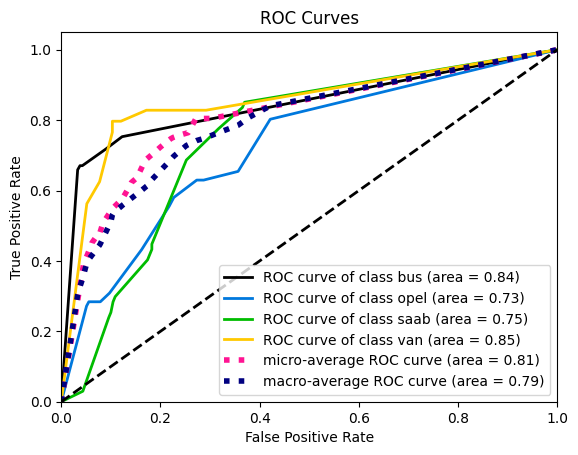

In [24]:
# Строим ROC-кривые 
predicted_proba_tree = grid_tree_pca.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc(y_test, predicted_proba_tree)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [25]:
from sklearn.ensemble import BaggingClassifier

def bagging_n_estimators(estimator, n_estimators, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test):
    '''
    Функция для перебора числа алгоритмов в бэггинге.
    Вход: estimator - алгоритм, который будет использоваться для бэггинга (модель), n_estimators - список чисел алгоритмов для перебора.
    Возвращает датафрейм с метриками acuuracy и f1 в зависимости от числа алгоритмов в ансамбле.
    Поскольку в задании указано, что размер подвыборок должен совпадать с размером оригинального датасета, по умолчанию обучаю не не pca-данных, а на нормализованных   
    '''
    sizes_of_ensemble = []
    accuracies = []
    f1_scores = []
    
    for n in n_estimators:
        bagging = BaggingClassifier(estimator=estimator, n_estimators=n, random_state=42)
        bagging.fit(X_train, y_train) 
        y_pred = bagging.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='micro')
        # записываем результат для каждой итерации
        sizes_of_ensemble.append(n)
        accuracies.append(acc)
        f1_scores.append(f1)
    
    # Сохраняем результаты в датафрейм
    results = pd.DataFrame({
        'n_estimators': sizes_of_ensemble,
        'accuracy' : accuracies,
        'f1' : f1_scores
    })
    return results

def plot_for_n_estimators(df):
    # функция для формирования графиков зависимостей accuracy и f1 от числа алгоритмов в ансамбле
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    axes[0].plot(df['n_estimators'], df['accuracy'])
    axes[0].set_xlabel('n_estimators')
    axes[0].set_ylabel('accuracy')
    axes[0].set_title('Accuracy')
    axes[0].set_xticks(df['n_estimators'])
    
    axes[1].plot(df['n_estimators'], df['f1'])
    axes[1].set_xlabel('n_estimators')
    axes[1].set_ylabel('f1')
    axes[1].set_title('F1')
    axes[1].set_xticks(df['n_estimators'])
    
    return fig


In [26]:
n_estimators = list(range(2, 101, 5)) # генерируем число алгоритмов для каждого шага (от 2 до 100 с шагом 5)

# 1. Ансамбль логистических регрессий
estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=best_C, penalty=best_penalty, random_state=42) # гиперпараметры из пункта 2.1
logreg_results = bagging_n_estimators(estimator, n_estimators)
logreg_results

,n_estimators,accuracy,f1
0,2,0.787879,0.787879
1,7,0.787879,0.787879
2,12,0.781145,0.781145
3,17,0.781145,0.781145
4,22,0.777778,0.777778
5,27,0.791246,0.791246
6,32,0.791246,0.791246
7,37,0.777778,0.777778
8,42,0.774411,0.774411
9,47,0.781145,0.781145


C:\Users\-\AppData\Local\Temp\ipykernel_22916\12798835.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_estimators(logreg_results).show()


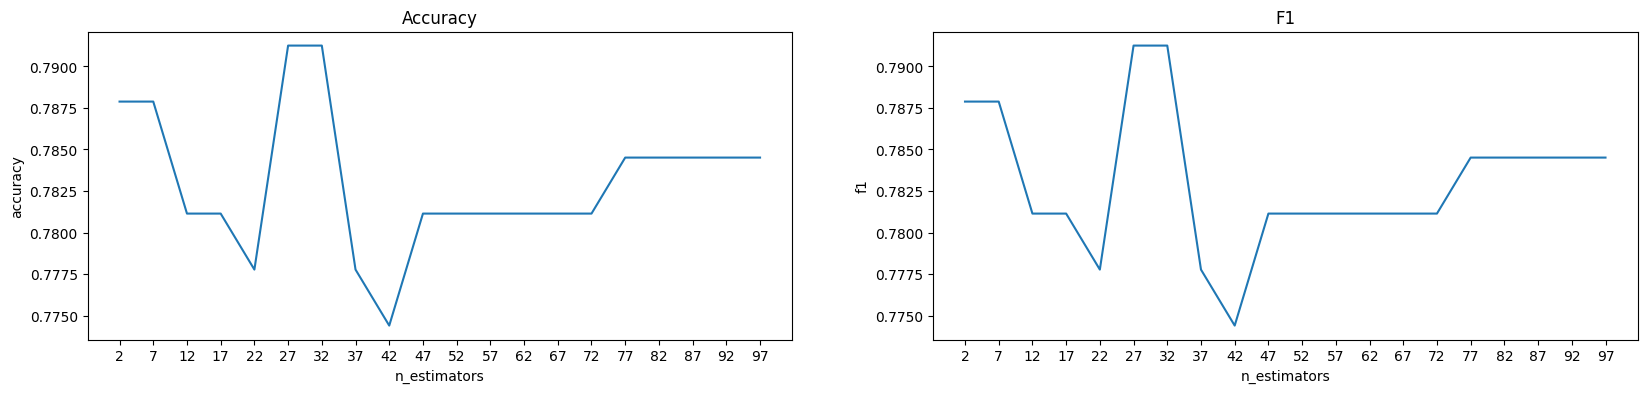

In [27]:
plot_for_n_estimators(logreg_results).show()

In [28]:
# Для удобства выведем строки из датафрейма с результатами, в которых наибольшие значения accuracy и f1
display(logreg_results[logreg_results['accuracy']==max(logreg_results['accuracy'])])
display(logreg_results[logreg_results['f1']==max(logreg_results['f1'])])

,n_estimators,accuracy,f1
5,27,0.791246,0.791246
6,32,0.791246,0.791246


,n_estimators,accuracy,f1
5,27,0.791246,0.791246
6,32,0.791246,0.791246


Вывод: графики f1 и accuracy в зависимости от числа моделей в ансамбле совпадают. Максимум для обеих метрик достигается при 27 и 32 моделях в ансамбле. Чтобы не увеличивать вес модели, оптимальнее выбрать меньшее число — 27.

In [29]:
# 2. Ансамбль деревьев решений
estimator = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42) # max_depth из пункта 2.5
trees_results = bagging_n_estimators(estimator, n_estimators)
trees_results

,n_estimators,accuracy,f1
0,2,0.680135,0.680135
1,7,0.717172,0.717172
2,12,0.720539,0.720539
3,17,0.707071,0.707071
4,22,0.717172,0.717172
5,27,0.707071,0.707071
6,32,0.720539,0.720539
7,37,0.723906,0.723906
8,42,0.727273,0.727273
9,47,0.727273,0.727273


C:\Users\-\AppData\Local\Temp\ipykernel_22916\370149857.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_estimators(trees_results).show()


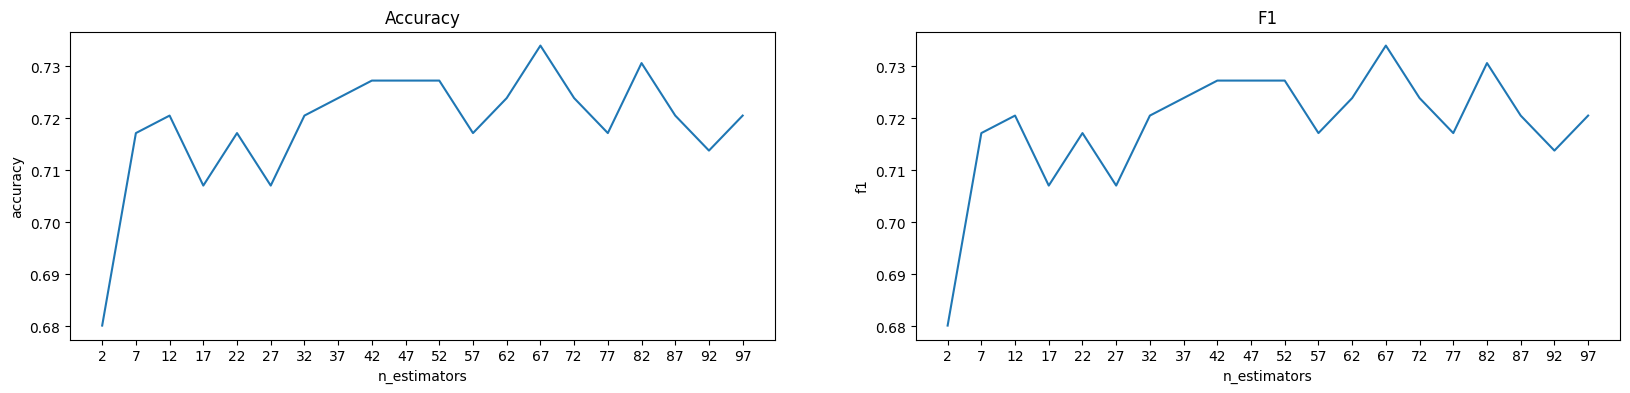

In [30]:
plot_for_n_estimators(trees_results).show()

In [31]:
# Для удобства выведем строки из датафрейма с результатами, в которых наибольшие значения accuracy и f1
display(trees_results[trees_results['accuracy']==max(trees_results['accuracy'])])
display(trees_results[trees_results['f1']==max(trees_results['f1'])])

,n_estimators,accuracy,f1
13,67,0.734007,0.734007


,n_estimators,accuracy,f1
13,67,0.734007,0.734007


Вывод: оптимальное число деревьев получилось 67. 

Accuracy и f1 получились даже лучше, чем у модели в пункте 2.5, на которой мы искали оптимальный гиперпараметр. Однако я считаю, что использовать данный гиперпараметр (из п. 2.5) не вполне корректно, поскольку там дерево было обучено на данных, прошедших через снижение размерности, а ансамбль мы обучаем на полноразмерных данных.
Возможно, что если бы мы подобрали оптимальный гиперпараметр на полноразмерных данных, то при использовании его в ансамбле получилось бы меньшее оптимальное количество деревьев.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [32]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_n_estimators(n_estimators, max_depth, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test):
    '''
    Функция для перебора числа алгоритмов в Random Forest.
    Вход: n_estimators - список чисел алгоритмов для перебора, гиперпараметр max_depth (по умолчанию равен 8 из пункта 2.5). 
    Возвращает датафрейм с метриками acuuracy и f1 в зависимости от числа алгоритмов в ансамбле.
    Поскольку в задании указано, что размер подвыборок должен совпадать с размером оригинального датасета, по умолчанию обучаю не не pca-данных, а на нормализованных.
    Гиперпараметр max_depth   
    '''
    sizes_of_ensemble = []
    accuracies = []
    f1_scores = []
    
    for n in n_estimators:
        random_forest = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=42)
        random_forest.fit(X_train, y_train) 
        y_pred = random_forest.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='micro')
        # записываем результат для каждой итерации
        sizes_of_ensemble.append(n)
        accuracies.append(acc)
        f1_scores.append(f1)
    
    # Сохраняем результаты в датафрейм
    results = pd.DataFrame({
        'n_estimators': sizes_of_ensemble,
        'f1' : accuracies,
        'accuracy' : f1_scores
    })
    return results

In [33]:
random_forest_results = random_forest_n_estimators(n_estimators, max_depth=best_max_depth) # max_depth из пункта 2.5
random_forest_results

,n_estimators,f1,accuracy
0,2,0.666667,0.666667
1,7,0.713805,0.713805
2,12,0.717172,0.717172
3,17,0.727273,0.727273
4,22,0.744108,0.744108
5,27,0.757576,0.757576
6,32,0.747475,0.747475
7,37,0.750842,0.750842
8,42,0.734007,0.734007
9,47,0.740741,0.740741


C:\Users\-\AppData\Local\Temp\ipykernel_22916\951010001.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_estimators(random_forest_results).show()


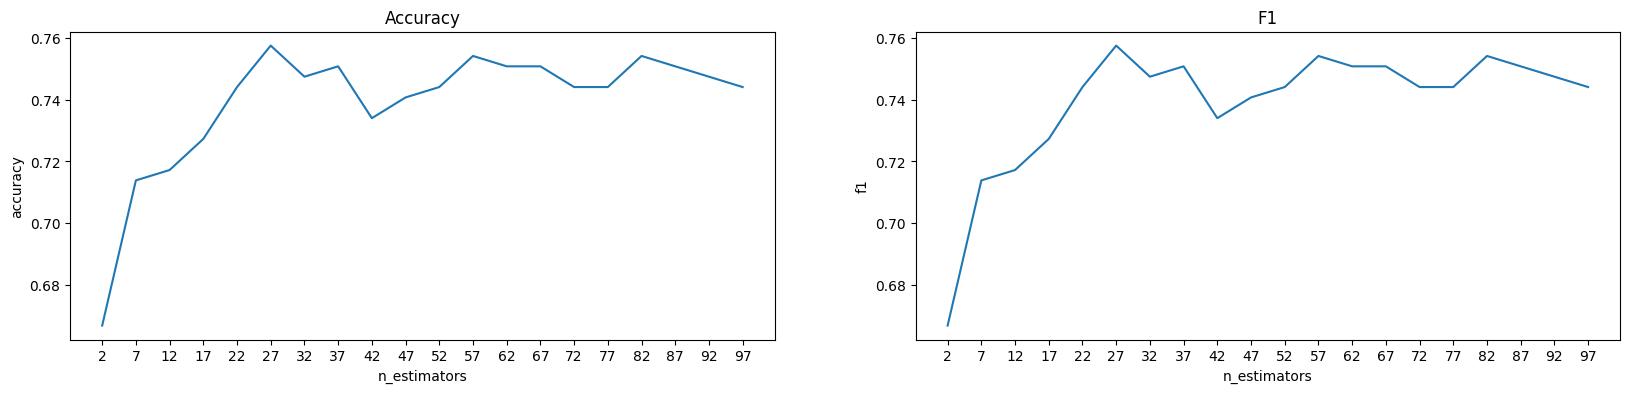

In [34]:
plot_for_n_estimators(random_forest_results).show()

In [35]:
# Для удобства выведем строки из датафрейма с результатами, в которых наибольшие значения accuracy и f1
display(random_forest_results[random_forest_results['accuracy']==max(random_forest_results['accuracy'])])
display(random_forest_results[random_forest_results['f1']==max(random_forest_results['f1'])])

,n_estimators,f1,accuracy
5,27,0.757576,0.757576


,n_estimators,f1,accuracy
5,27,0.757576,0.757576


Вывод: максимальные значения метрик достигаются при максимальном из протестированных значений — 27 алгоритмов в случайном лесе. 

В бэггинге максимум достигался при 27 алгоритмах логистической регрессии и при 67 решающих деревьях. 

В отличие от бэггинга, RandomForest обучает алгоритмы, делая подвыборки не только по числу объектов, но и по числу признаков, выбирая подвыборку признаков случайным образом для каждого дерева. Разница в их устройстве, видимо, влияет и на получившееся оптимальное количество алгоритмов.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [37]:
train_size = X_train_st.shape[0] # 549
batch_size = 55 # 9 по 55, остаток 54
# считаем конечные индексы для каждой подвыборки
idx = []
i = 0
for m in range(0, 10):
    end = i + batch_size
    if end > train_size:
        end = train_size
    idx.append(end)
    i = end
idx    

[55, 110, 165, 220, 275, 330, 385, 440, 495, 549]

In [38]:
def model_n_parts(model, n_parts):
    # функция для обучения модели на заданном числе подвыборок
    X_train_temp = X_train_st[0:idx[n_parts], :]
    y_train_temp = y_train[0:idx[n_parts]]
    
    model.fit(X_train_temp, y_train_temp)
    y_pred = model.predict(X_test_st)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    
    return acc, f1

def get_results_df(model):
    # функция, которая возвращает датафрейм с результатами использования функции model_n_parts для числа подвыборок от 1 до 10
    parts_count = []
    accuracies = []
    f1_scores = []
    
    for n_parts in range(0, 10):
        acc, f1 = model_n_parts(model, n_parts)
        
        # записываем результат для каждой итерации
        parts_count.append(n_parts+1)
        accuracies.append(acc)
        f1_scores.append(f1)
        
    # Сохраняем результаты в датафрейм
    results = pd.DataFrame({
        'parts_count': parts_count,
        'accuracy' : accuracies,
        'f1' : f1_scores
    })
    return results
    
def plot_for_n_parts(df):
    # функция для формирования графиков зависимостей accuracy и f1 от размера обучающего датасета (числа подвыборок)
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    axes[0].plot(df['parts_count'], df['accuracy'])
    axes[0].set_xlabel('parts_count')
    axes[0].set_ylabel('accuracy')
    axes[0].set_title('Accuracy')
    axes[0].set_xticks(df['parts_count'])
    
    axes[1].plot(df['parts_count'], df['f1'])
    axes[1].set_xlabel('parts_count')
    axes[1].set_ylabel('f1')
    axes[1].set_title('F1')
    axes[1].set_xticks(df['parts_count'])
    
    return fig

In [39]:
# 1. Logistic regression
estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=best_C, penalty=best_penalty, random_state=42) # гиперпараметры из пункта 2.1
results_logreg = get_results_df(estimator)
results_logreg

c:\Users\-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,parts_count,accuracy,f1
0,1,0.710438,0.710438
1,2,0.727273,0.727273
2,3,0.750842,0.750842
3,4,0.754209,0.754209
4,5,0.781145,0.781145
5,6,0.774411,0.774411
6,7,0.777778,0.777778
7,8,0.781145,0.781145
8,9,0.781145,0.781145
9,10,0.784512,0.784512


C:\Users\-\AppData\Local\Temp\ipykernel_22916\2452232566.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_parts(results_logreg).show()


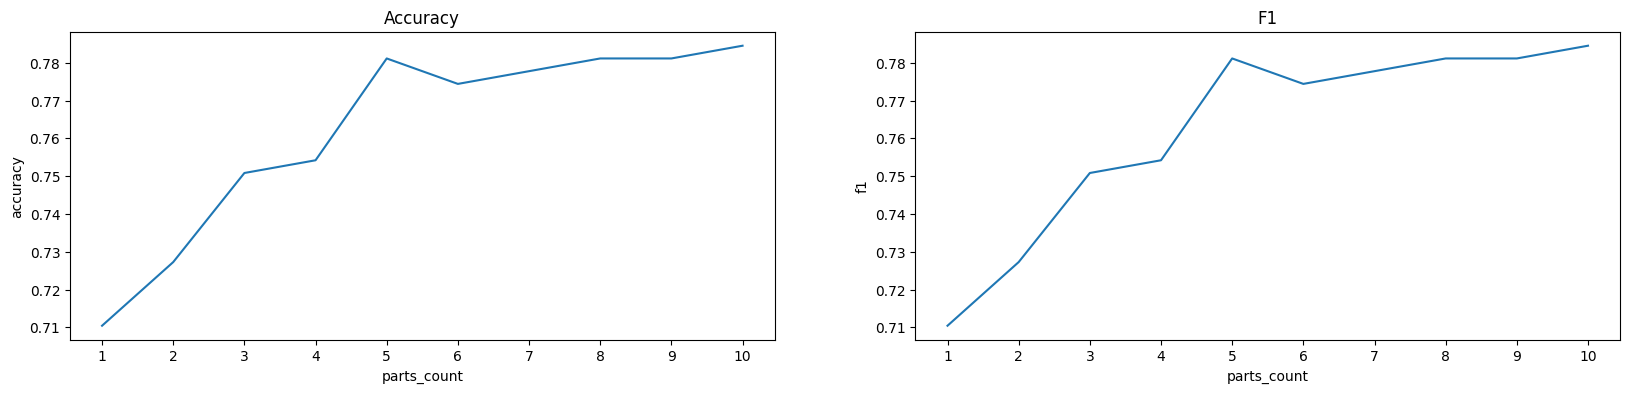

In [40]:
plot_for_n_parts(results_logreg).show()

In [41]:
# 2. Desicion Tree
estimator = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42) # max_depth из пункта 2.5
results_tree = get_results_df(estimator)
results_tree

,parts_count,accuracy,f1
0,1,0.575758,0.575758
1,2,0.646465,0.646465
2,3,0.659933,0.659933
3,4,0.676768,0.676768
4,5,0.693603,0.693603
5,6,0.707071,0.707071
6,7,0.710438,0.710438
7,8,0.713805,0.713805
8,9,0.673401,0.673401
9,10,0.643098,0.643098


C:\Users\-\AppData\Local\Temp\ipykernel_22916\2273402464.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_parts(results_tree).show()


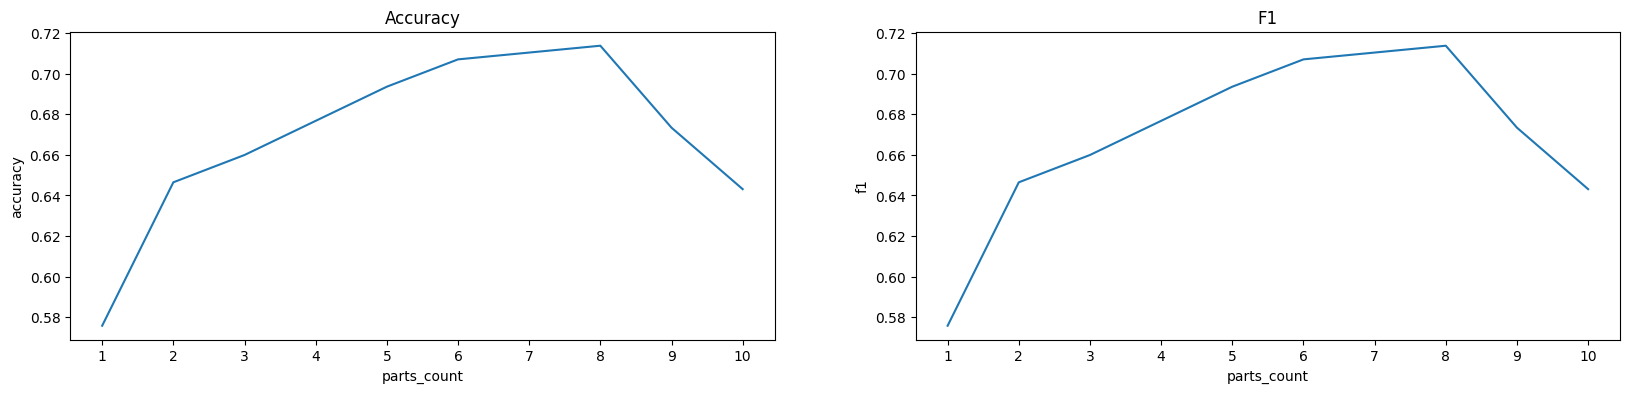

In [42]:
plot_for_n_parts(results_tree).show()

In [43]:
# 3. Random Forest
estimator = RandomForestClassifier(max_depth=best_max_depth, random_state=42)
results_rf = get_results_df(estimator)
results_rf

,parts_count,accuracy,f1
0,1,0.646465,0.646465
1,2,0.703704,0.703704
2,3,0.734007,0.734007
3,4,0.720539,0.720539
4,5,0.750842,0.750842
5,6,0.734007,0.734007
6,7,0.730640,0.730640
7,8,0.750842,0.750842
8,9,0.754209,0.754209
9,10,0.750842,0.750842


C:\Users\-\AppData\Local\Temp\ipykernel_22916\1224623756.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_for_n_parts(results_rf).show()


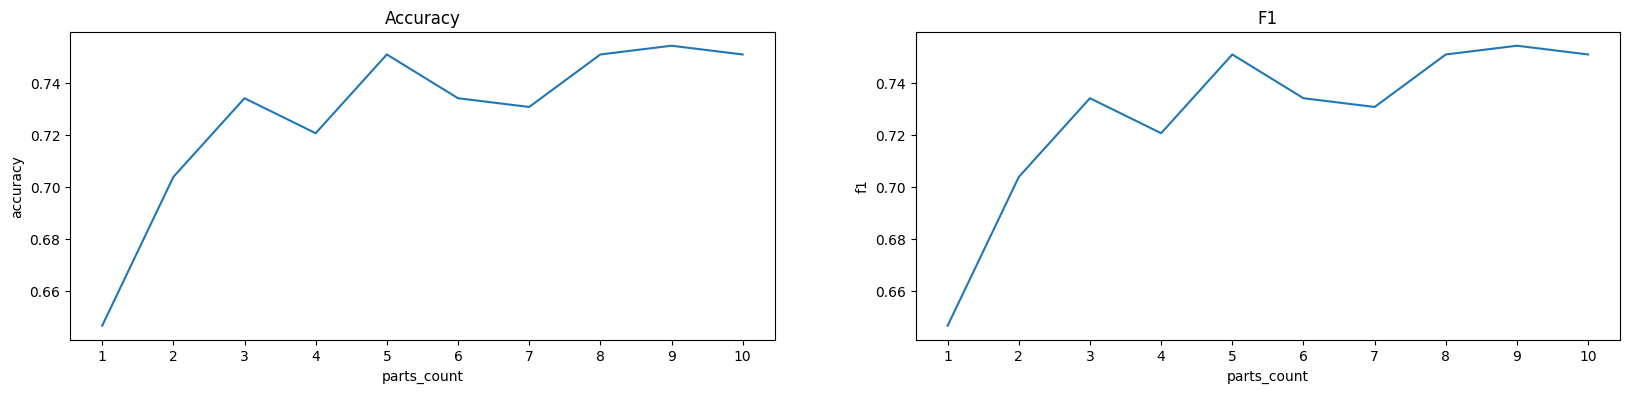

In [44]:
plot_for_n_parts(results_rf).show()

**Общий вывод по трем графикам:** размер обучающей выборки влияет на качество модели нелинейно, линии графика ломаные. 
* Логистическая регрессия показала наилучший результат при максимальном размере выборки. 
* Так же повел себя и случайный лес, однако максимальный уровень качества он получил не только при 10, но и при 5 частях тренировочного датасета. 
* А одиночное дерево решений вообще показало лучшее качество при 8 частях выборки, а при дальнейшем увеличении тренировочного датасета качество резко упало.

В целом тенденция к росту качества с ростом обучающей выборки прослеживается, ведь больший размер датасета — это большее количество информации для обучения. Возможно, если бы мы продолжили тестирование с еще большими размерами выборки, то положительная взаимосвязь получилась бы более заметной даже для одиночного дерева решений. 